In [1]:
!pip install -q -U kaggle_environments

     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 


In [2]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import evaluate

In [ ]:
#Example of the simple agent
#0 - rock
#1 - paper
#2 - scissors

Агенты, возвращающие только камни или только ножницы или только бумагу

In [3]:
%%writefile rock_agent.py


def rock_agent(observation, configuration):
    return 0

Writing rock_agent.py


In [4]:
%%writefile paper_agent.py


def paper_agent(observation, configuration):
    return 1

Writing paper_agent.py


In [5]:
%%writefile scissors_agent.py


def scissors_agent(observation, configuration):
    return 2

Writing scissors_agent.py


Попробуем теперь использовать информацию о прошлых действиях противника. Опишем агента, который производит то же самое действие, что и оппонент на прошлом ходу

In [6]:
%%writefile copy_opponent.py


def copy_opponent(observation, configuration):
    import random
    #in case we have information about opponent last move
    if observation.step > 0:
        return observation.lastOpponentAction
    #initial step
    else:
        return random.randrange(0, configuration.signs)

Writing copy_opponent.py


Агент, который возвращает случайное значение.

In [7]:
%%writefile random_agent.py

import random

def rnm_agent(observation, configuration):
    return random.randrange(0, configuration.signs)

Writing random_agent.py


Агенты, которые возвращают только два варианта - (0, 1), (1, 2), (0, 2).

In [11]:
%%writefile rock_paper_agent.py
import random

def rock_paper_agent(observation, configuration):
    return random.randrange(0, 1)

Overwriting rock_paper_agent.py


In [12]:
%%writefile paper_scirrors_agent.py
import random

def paper_scirrors_agent(observation, configuration):
    return random.randrange(1, 2)

Overwriting paper_scirrors_agent.py


In [13]:
%%writefile rock_scirrors_agent.py
import random

def rock_scirrors_agent(observation, configuration):
    return random.randrange(0, 2, 2)

Overwriting rock_scirrors_agent.py


Агент, стратегия которого, если шаг поединка делится нацело на 10, возвращать 0. Если остаток от деления на 10 равен 1, возвращать 1. Если остаток от деления на 10 равен 2, возвращать 2. В остальных случаях возвращать случайное число.

In [32]:
%%writefile step_agent.py
import random

step_action = None


def step_agent(observation, configuration):
    global step_action
    if observation.step % 10 == 0:
        step_action = 0
    elif observation.step % 10 == 1:
        step_action = 1
    elif observation.step % 10 == 2:
        step_action = 2
    else:
        return random.randrange(0, configuration.signs)
    return step_action

Writing step_agent.py


Агент, который на четном шаге возвращает 0, на нечетном - 1.

In [33]:
%%writefile even_odd_agent.py

step_action = None


def even_odd(observation, configuration):
    global step_action
    if observation.step % 2 == 0:
        step_action = 0
    elif observation.step % 2 == 1:
        step_action = 1
  
    return step_action

Writing even_odd_agent.py


Агент, который на четном шаге возвращает 2, на нечетном - 1.

In [34]:
%%writefile even_odd_1_2_agent.py

step_action = None


def even_odd_1_2(observation, configuration):
    global step_action
    if observation.step % 2 == 0:
        step_action = 0
    elif observation.step % 2 == 1:
        step_action = 1
  
    return step_action

Writing even_odd_1_2_agent.py


Агенты, предложенные kaggle

In [14]:
%%writefile reactionary_agent.py
import random
from kaggle_environments.envs.rps.utils import get_score

last_react_action = None


def reactionary(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_react_action

Writing reactionary_agent.py


In [15]:
%%writefile counter_reactionary.py
import random
from kaggle_environments.envs.rps.utils import get_score


last_counter_action = None


def counter_reactionary(observation, configuration):
    global last_counter_action
    if observation.step == 0:
        last_counter_action = random.randrange(0, configuration.signs)
    elif get_score(last_counter_action, observation.lastOpponentAction) == 1:
        last_counter_action = (last_counter_action + 2) % configuration.signs
    else:
        last_counter_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_counter_action

Writing counter_reactionary.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр

Для начала создадим список агентов. Их 13

In [35]:
agents = ["rock_agent.py", 
          "paper_agent.py", 
          "scissors_agent.py", 
          "random_agent.py", 
          "copy_opponent.py", 
          "rock_paper_agent.py", 
          "paper_scirrors_agent.py", 
          "rock_scirrors_agent.py",
          "step_agent.py",
          "even_odd_agent.py",
          "even_odd_1_2_agent.py",
          "reactionary_agent.py", 
          "counter_reactionary.py"
          ]

Теперь создадим статистику

In [36]:
n_agents = len(agents)

scores = np.zeros((n_agents, n_agents), dtype=np.int)
print(scores)

[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Пройдемся циклом и запишем результаты игр в подготовленную статистику.

In [37]:
for i in range(n_agents):
    for j in range(i + 1, n_agents):
        current_score = evaluate(
            "rps", #environment to use - no need to change
           [agents[i], agents[j]], #agents to evaluate
           configuration={"episodeSteps": 500, "tieRewardThreshold": 1} #number of episodes 
        )

        scores[i, j] = current_score[0][0]
        scores[j, i] = current_score[0][1]

Результаты

In [38]:
print(scores)

[[   0 -499  499  -25   -1    0 -499    0    5 -249 -249 -498 -249]
 [ 499    0 -499   27    1  499    0  499  -23  250  250 -499 -250]
 [-499  499    0  -16   -1 -499  499 -499   10   -1   -1 -499 -248]
 [  25  -27   16    0  -12   31   13   -5   40  -18  -20  -24   40]
 [   1   -1    1   12    0   -1   -1    1  -90    0    0 -250  499]
 [   0 -499  499  -31    1    0 -499    0   15 -249 -249 -497 -249]
 [ 499    0 -499  -13    1  499    0  499  -17  250  250 -499 -250]
 [   0 -499  499    5   -1    0 -499    0  -10 -249 -249 -497 -250]
 [  -5   23  -10  -40   90  -15   17   10    0  -51  -61    7  -13]
 [ 249 -250    1   18    0  249 -250  249   51    0    0  250  249]
 [ 249 -250    1   20    0  249 -250  249   61    0    0  248  249]
 [ 498  499  499   24  250  497  499  497   -7 -250 -248    0 -497]
 [ 249  250  248  -40 -499  249  250  250   13 -249 -249  497    0]]


Переводим в dataframe и визуализируем.

In [ ]:
df_scores = pd.DataFrame(
    scores, 
    index=agents, 
    columns=agents,
)

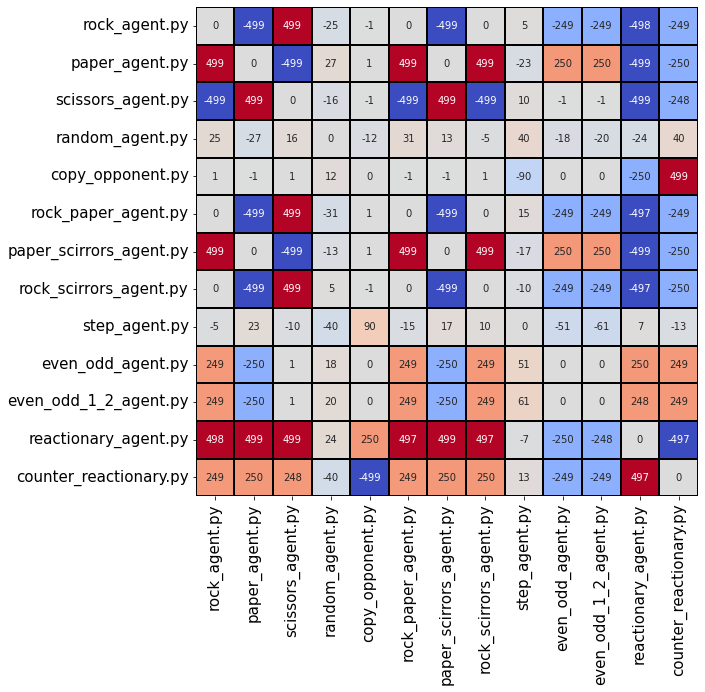

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df_scores, annot=True, cbar=False, 
    cmap='coolwarm', linewidths=1, 
    linecolor='black', fmt="d",
)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15);

Рассчитаем среднее значение

In [40]:
df_scores['mean'] = df_scores.mean(axis=0)

df_scores['mean'].sort_values(ascending=False)

rock_agent.py              135.769231
rock_paper_agent.py        135.230769
rock_scirrors_agent.py     134.615385
scissors_agent.py           96.538462
step_agent.py                3.692308
random_agent.py             -4.538462
copy_opponent.py           -13.153846
paper_scirrors_agent.py    -55.384615
paper_agent.py             -58.000000
even_odd_agent.py          -62.769231
even_odd_1_2_agent.py      -63.538462
counter_reactionary.py     -74.538462
reactionary_agent.py      -173.923077
Name: mean, dtype: float64

Лучше всего себя показали агенты со стратегиями выбора из двух вариантов и с выбором только одного варианта. Причем все они содержат в себе выбор камня.